In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

# Cleveland dataset analysis 

# Introduction
heart disease is becoming increasingly more common with 695,000 people dying from it every year in the US, according to the department of health heart disease and stroke prevention , and has been on the rise in the last couple of years (American Heart Association 2023). Because of this it is important to identify how someone might end up with heart disease and figuring out how we can lower the rate of heart disease. This brings us the the important question of how do people's existing health factors affect their chances of obtaining heart disease. With this project I will try and answer this question by correctly identifying which health factors puts you at risk of obtaining heart disease, more specifically if higher levels of a specific variable or lower values of a specific variable translates to a higher risk of heart disease. The dataset I will being using is from cleveland located in the United States of America. I chose this specifically because the US has one of the highest rates of heart disease in the world. 


# Method
I will be exploring this question mainly through 4 colums of data which are age, cholesterol, resting blood pressure, and maximun heart rate achieved upon entering the hospital. I will be using classification in conjunction with these variables to try and predict if a high or low score in any of these factors will contribute to a higher chance of getting heart disease. I will visualize the results with scatterplots. 

# Expected outcomes and significance:
I expect to find that the higher the age, cholesterol, and resting blood pressure the higher chance of getting heart disease increase. None of which have missing data. Inversely I expect to find that if the maximum heart rate is lower it will lower the chance of people getting heart disease. I believe that these findings could have a great impact in the future and help with lowering the rate of heart disease around the world. Some future questions this could lead to is how can we lower the factors contributing to heart disease now that we know what variables contribute the most towards heart disease.
 



In [2]:

set.seed(20)
project_data <- read_csv("https://raw.githubusercontent.com/yobrap/Dsci-Project/main/data/heart_disease/processed.cleveland.data", col_names = FALSE)

colnames(project_data) <- c("age", "sex", "cp","trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal", "num")

project_data <- mutate(project_data, num = as_factor(num)) 
project_data <- mutate(project_data, num = fct_recode(num, disease = "1",
                                 disease = "2", 
                                 disease = "3",
                                 disease = "4",
                                 clean = "0"))


project_data <- select(project_data, age, chol, trestbps, thalach, num)

project_data



Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,chol,trestbps,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,233,145,150,clean
67,286,160,108,disease
67,229,120,129,disease
37,250,130,187,clean
41,204,130,172,clean
56,236,120,178,clean
62,268,140,160,disease
57,354,120,163,clean
63,254,130,147,disease


A tidy dataset of all the variables I will use for my project

In [3]:
project_data_summarize <- project_data |> group_by(num) |>
                          summarize(Total_cases = n())
project_data_summarize

num,Total_cases
<fct>,<int>
clean,164
disease,139


Summarization of total cases in proportion to clean and diseased

# Graph 1

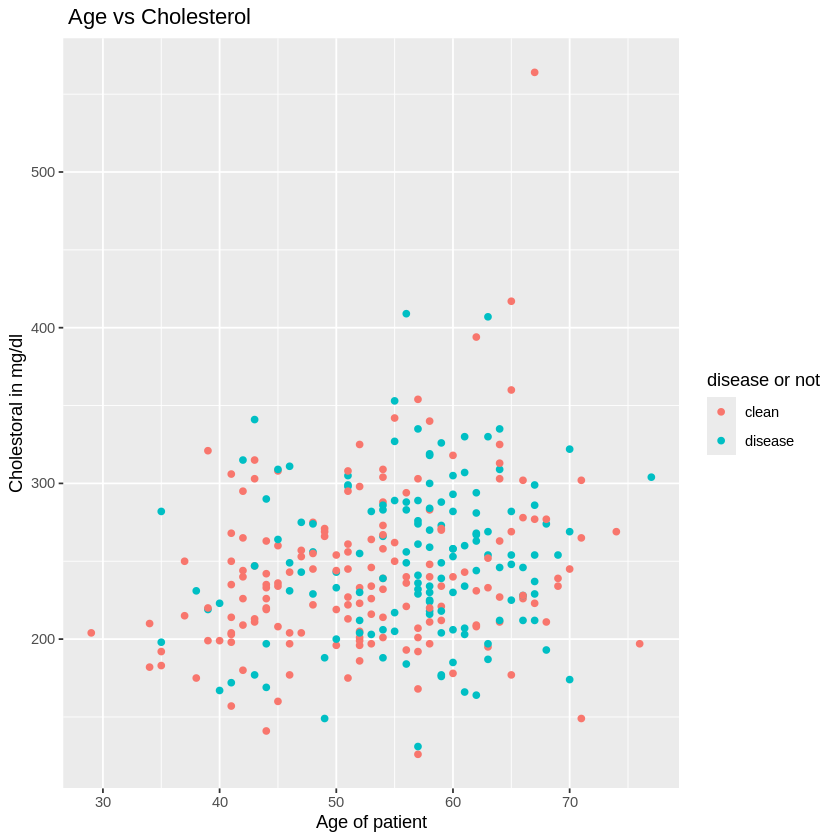

In [6]:
project_graph <- ggplot(project_data, aes(x = age, y = chol, color = num)) + 
            geom_point() + 
            labs(x = "Age of patient", y = "Cholesterol in mg/dl", color = "disease or not") +
            ggtitle(" Age vs Cholesterol")
            

project_graph
                  

This table shows the relationship of heart disease relative to age and cholesterol. From this graph we can see that age and cholestral seems to play a factor in whether or not someoen develops heart disease

# Graph 2

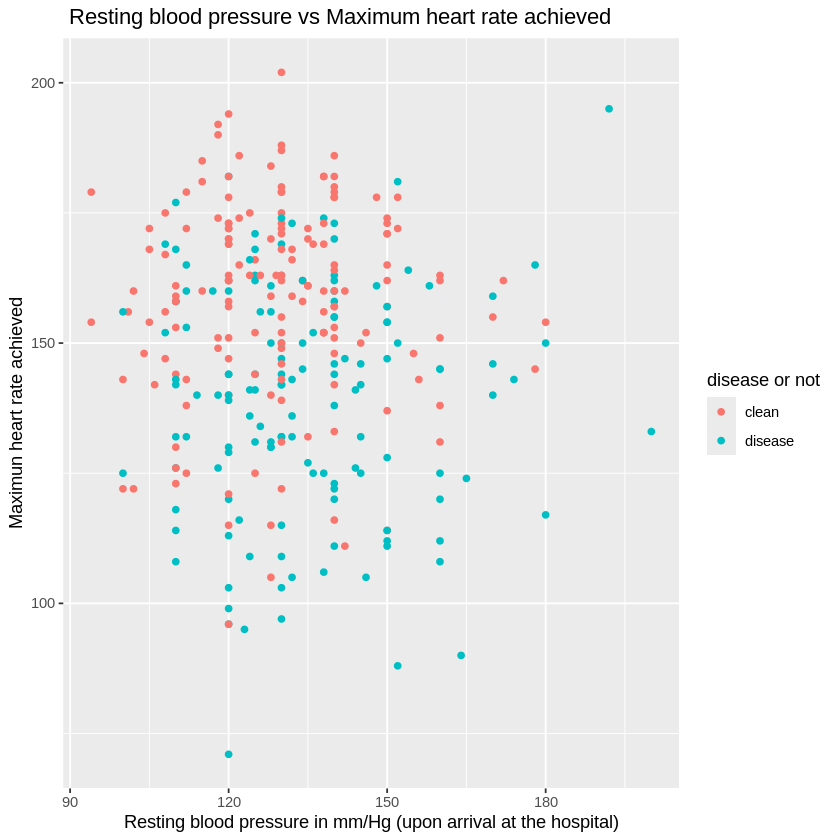

In [7]:
 project_graph <- ggplot(project_data, aes(x = trestbps, y = thalach, color = num)) + 
            geom_point() + 
            labs(x = "Resting blood pressure in mm/Hg (upon arrival at the hospital)",
                 y = "Maximun heart rate achieved", color = "disease or not") +
                ggtitle(" Resting blood pressure vs Maximum heart rate achieved")

project_graph

This table shows the relationship of heart disease relative to resting blood pressure and maximum heart rate achieved. It would seem that the lower your heart rate and lower your resting blood pressure the higher your chances of getting heart disease

# Works Cited

Department of Health. Heart Disease and Stroke Prevention. (n.d.). https://health.ny.gov/diseases/cardiovascular/heart_disease/#:~:text=About%20695%2C000%20people%20die%20of,Americans%20have%20a%20heart%20attack. 
Cardiovascular deaths saw steep rise in U.S. during first year of the COVID-19 pandemic. www.heart.org. (2023, May 23). https://www.heart.org/en/news/2023/01/25/cardiovascular-deaths-saw-steep-rise-in-us-during-first-year-of-the-covid-19-pandemic 